In [1]:
import seaborn as sns

In [2]:
import pandas as pd 
import numpy as np


In [3]:
df = pd.read_csv('Country-data.csv')

In [4]:
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [5]:
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


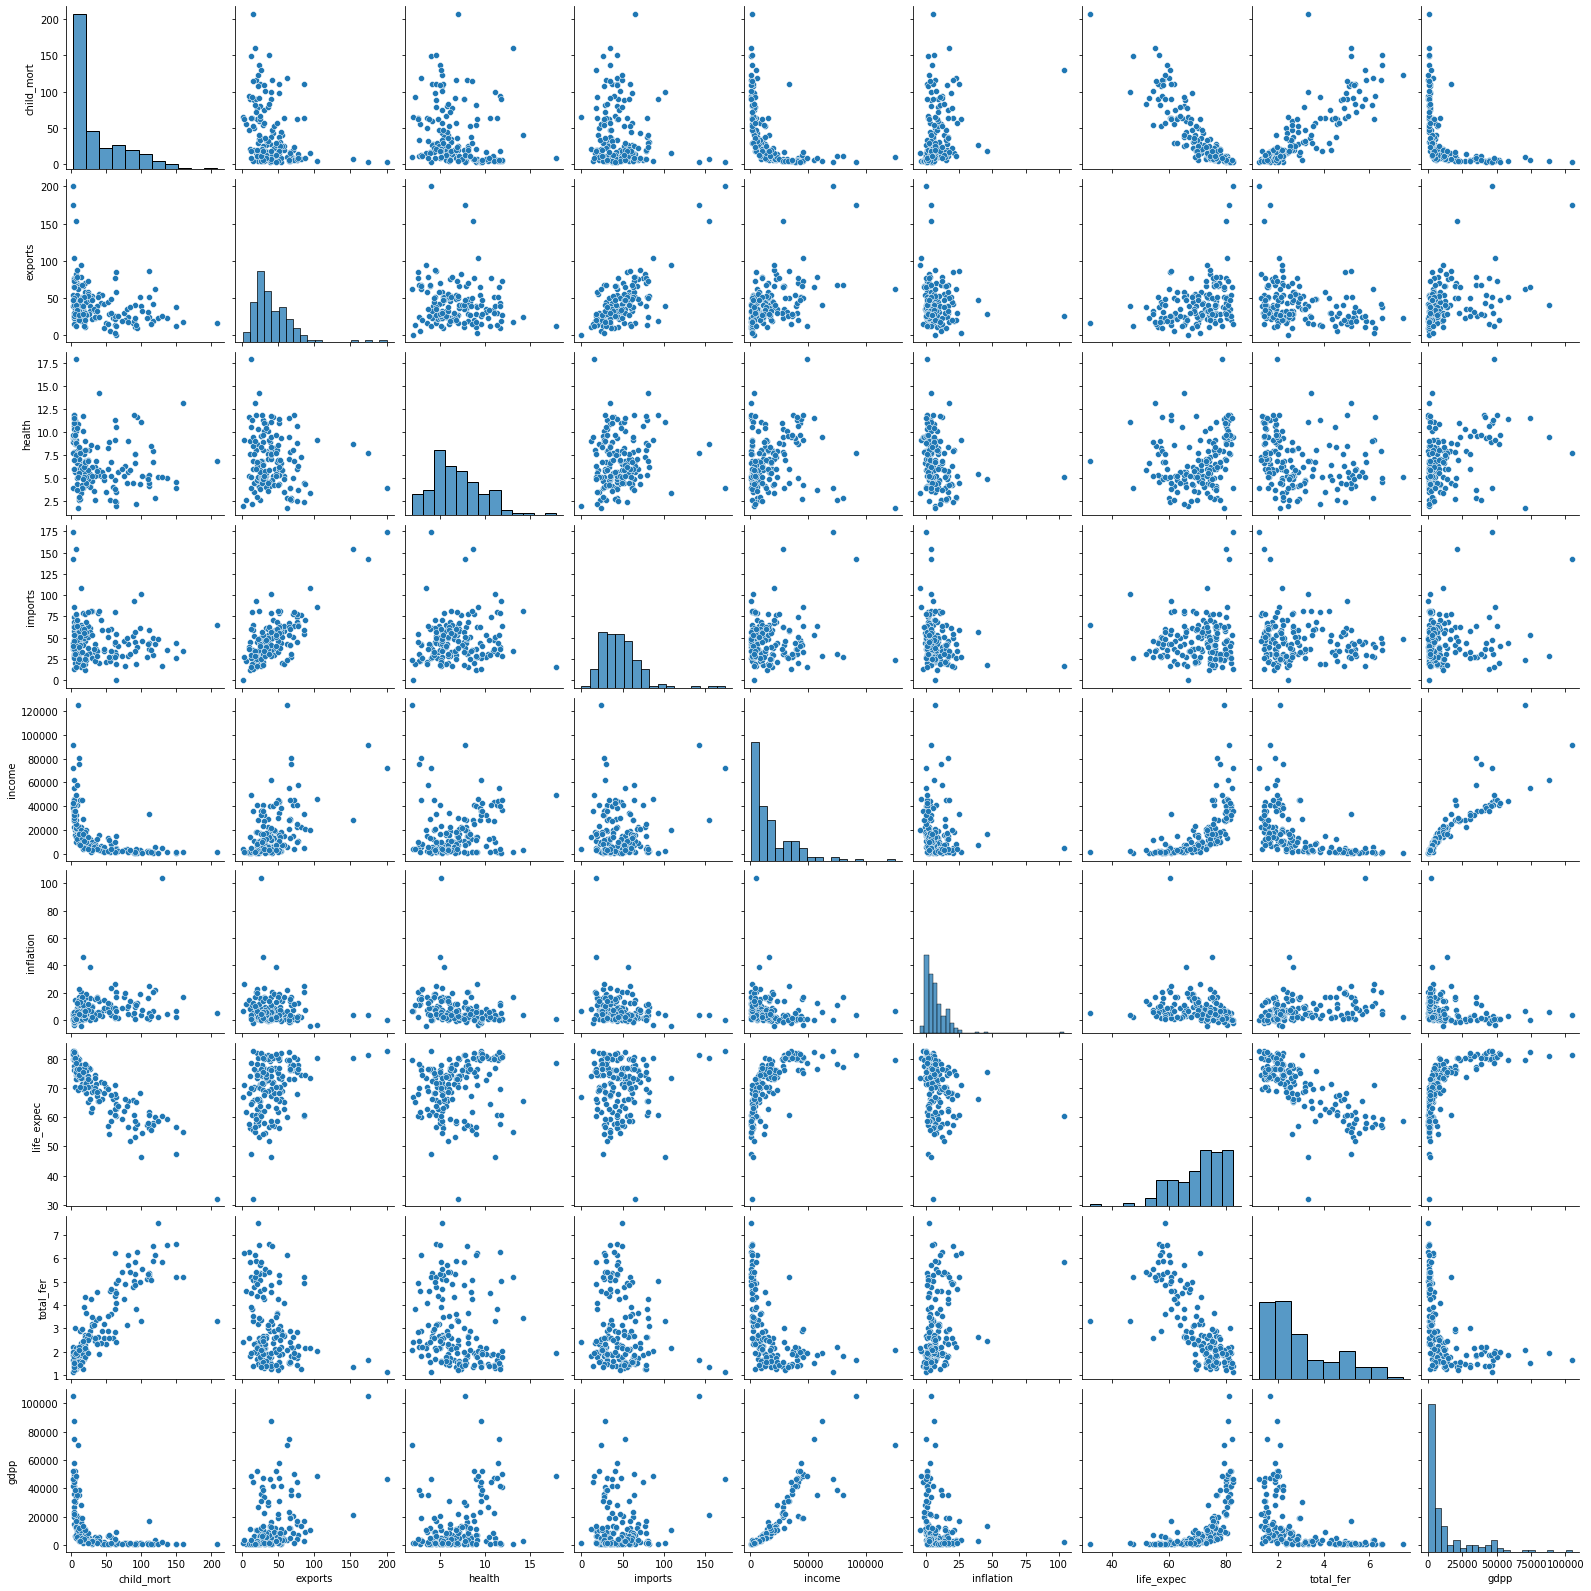

In [7]:
sns.pairplot(df)

In [11]:
df.country.nunique()

167

In [12]:
df.drop('country', axis=1, inplace= True)

In [13]:
from sklearn.cluster import KMeans
# definning the correct numbers of clusters using the elbow method
scores = []
for i in range(2,15):

  kmeans = KMeans(n_clusters= i)
  kmeans.fit_transform(df)
  scores.append(kmeans.inertia_)


Text(0, 0.5, 'inertia')

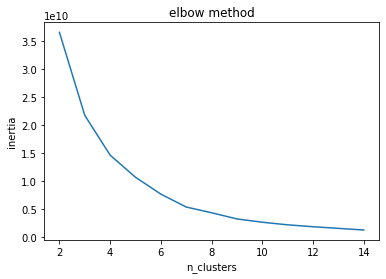

In [21]:
import matplotlib.pyplot as plt

plt.plot(range(2,15),scores)
plt.title('elbow method')
plt.xlabel('n_clusters')
plt.ylabel('inertia')


In [20]:
kmeans = KMeans(n_clusters= 5)
kmeans.fit(df)

KMeans(n_clusters=5)

In [24]:
clusters=kmeans.predict(df)

In [26]:
df['cluster'] = clusters

In [27]:
df

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,4
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,4
...,...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,1
163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,4
164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,1
165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,1


In [32]:
# Hierarical clustering

In [33]:
df.drop('cluster', axis=1, inplace=True)

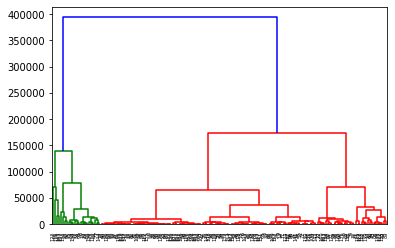

In [34]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

dendrogram=sch.dendrogram(sch.linkage(df,method='ward'))

In [35]:
# went to another deeper level in hirarical clustering by choosing 8 clusters
model=AgglomerativeClustering(n_clusters=8)
clusters=model.fit_predict(df)
df['clusters']=clusters
df

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusters
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,7
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,6
...,...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,7
163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,6
164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,7
165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,7


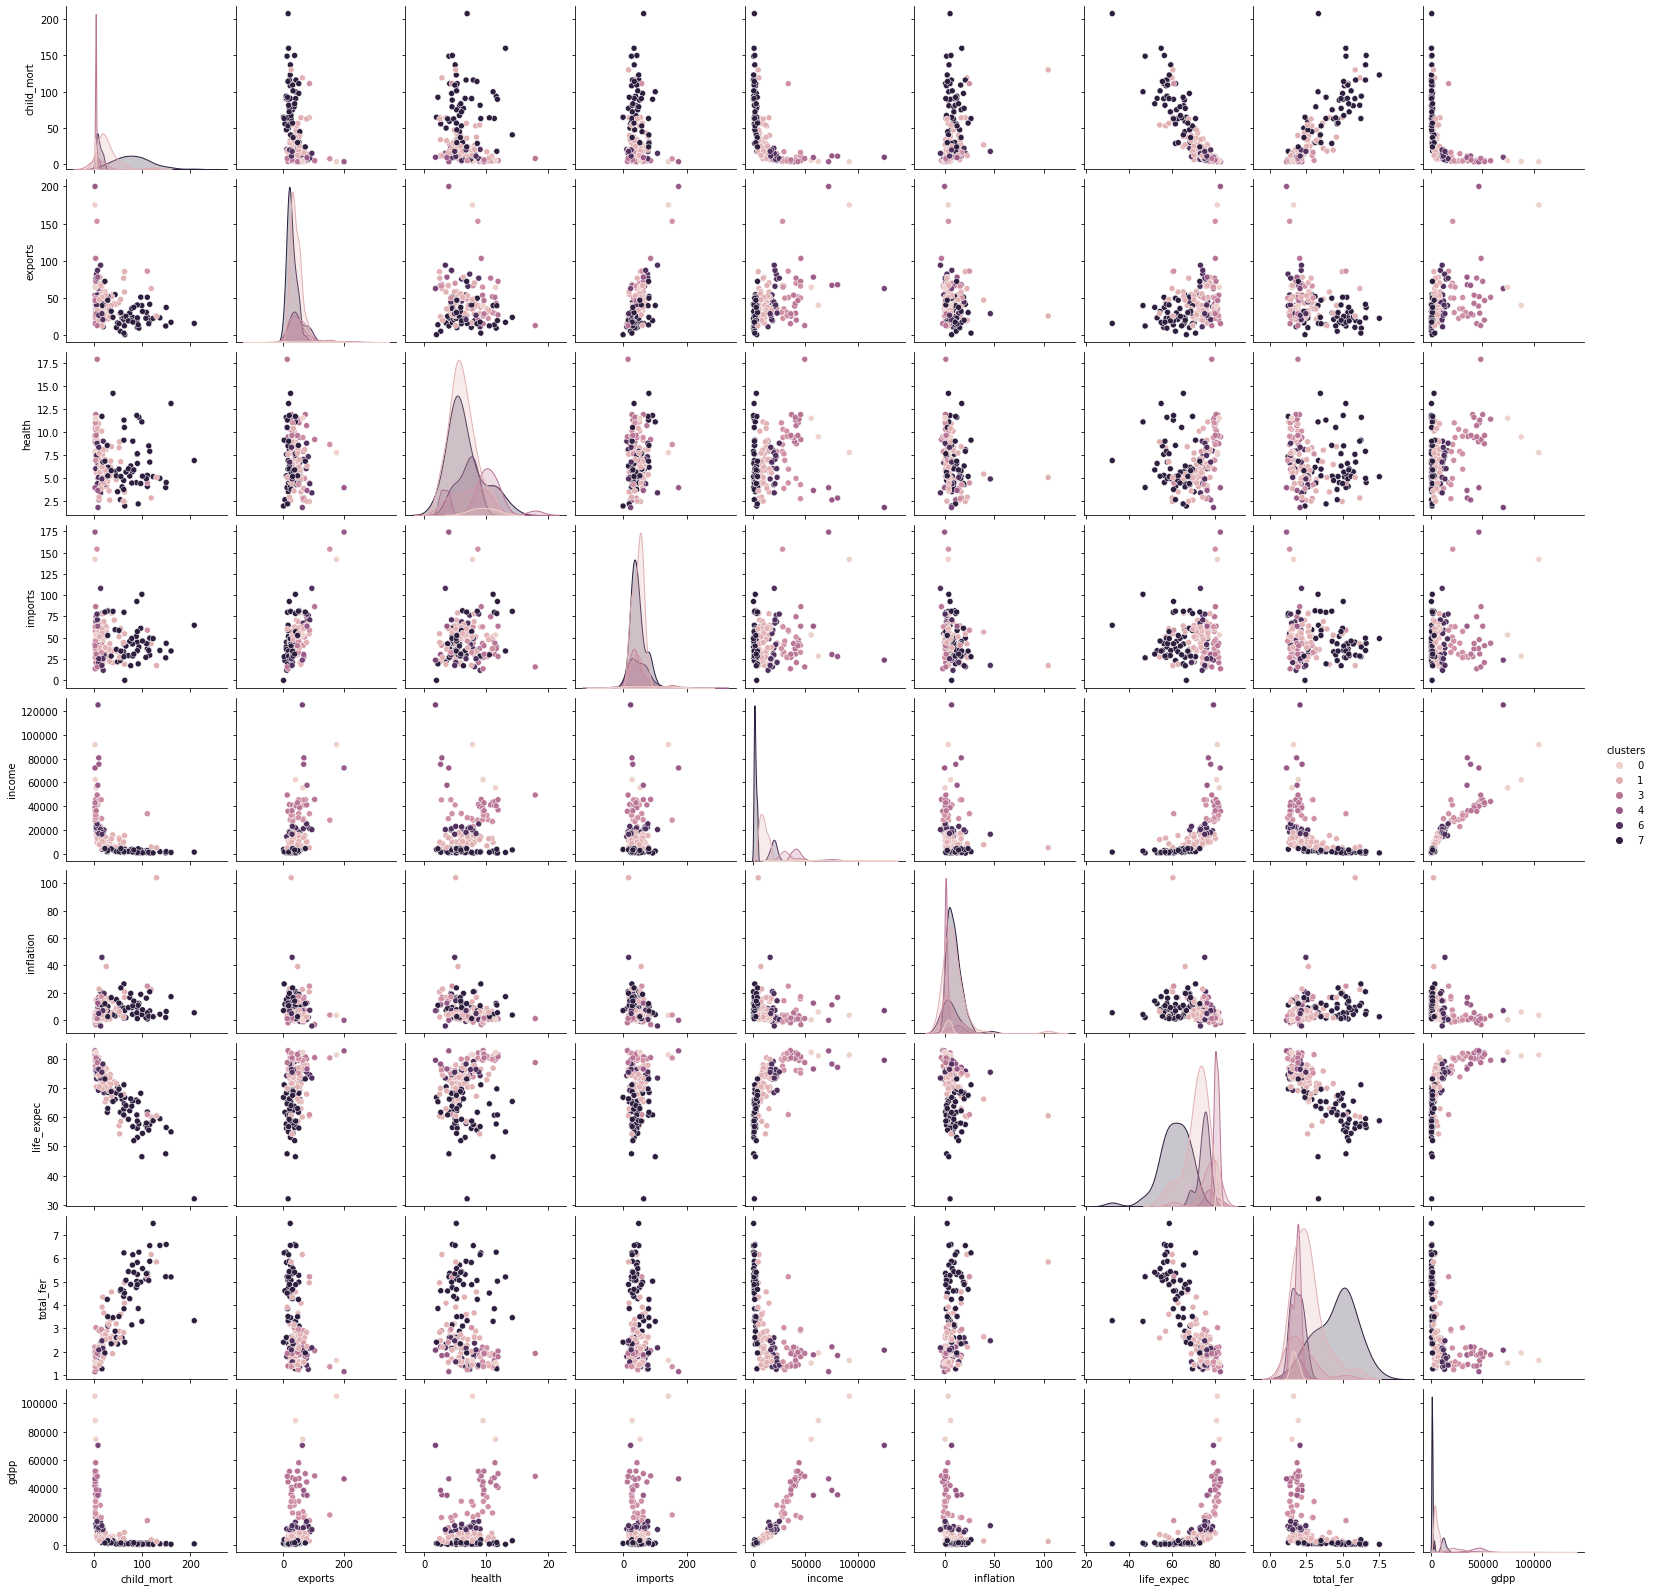

In [36]:
sns.pairplot(df, hue='clusters')

In [37]:
# trying 4 clusters and compare the differences
model=AgglomerativeClustering(n_clusters=4)
clusters=model.fit_predict(df)
df['clusters']=clusters
df

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusters
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,2
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,2
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,2
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,3
...,...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,2
163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,3
164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,2
165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,2


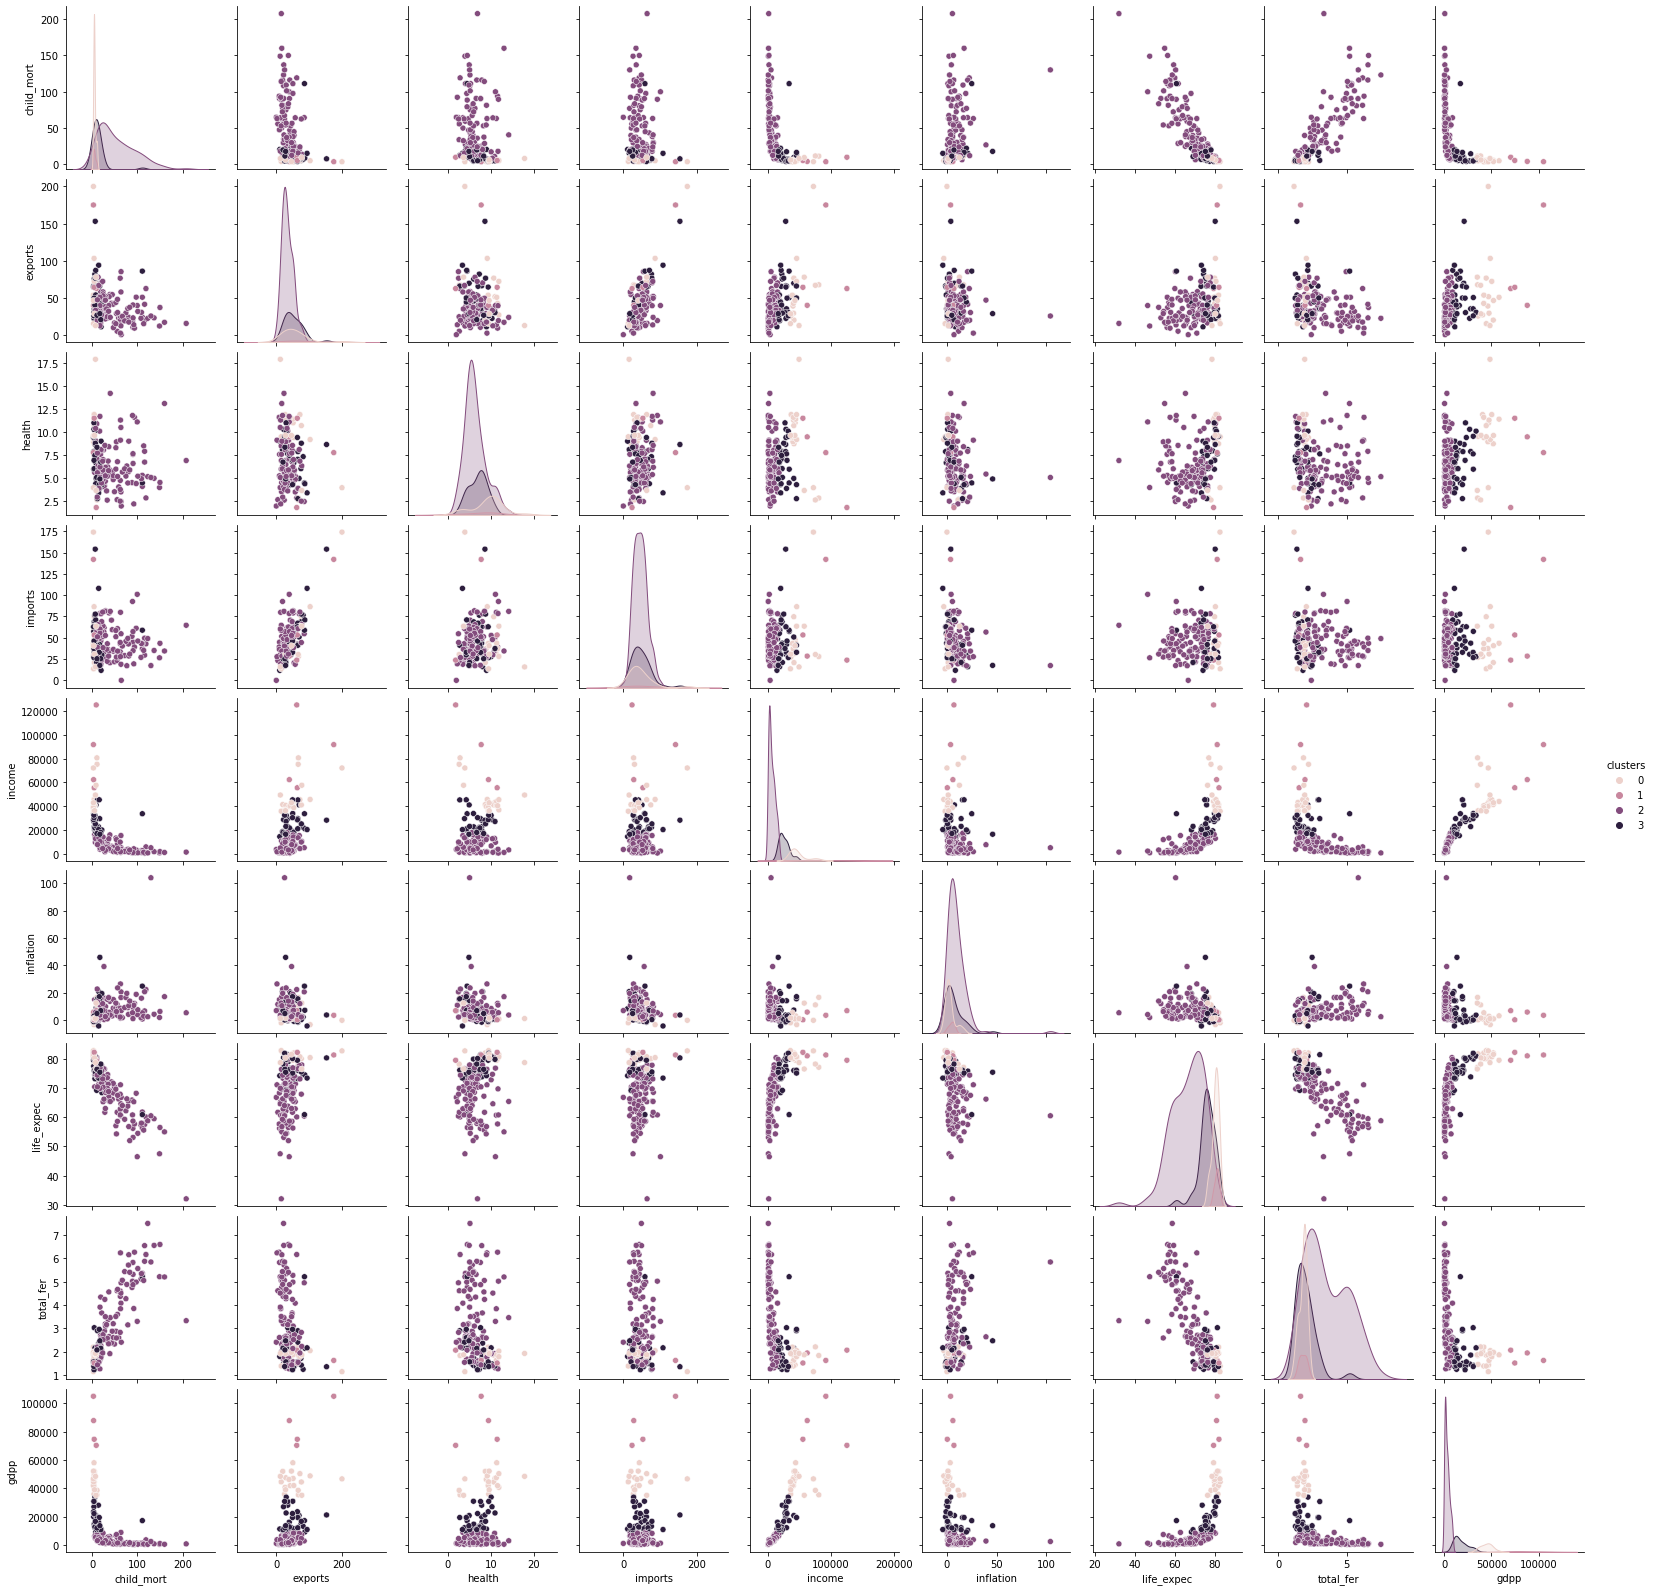

In [38]:
sns.pairplot(df, hue='clusters')

In [ ]:
# clustering to 4 categories combines the categories  together.